<a href="https://colab.research.google.com/github/quartermaine/Machine-Learning-Notebooks/blob/main/Anomaly_Detection/Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# START NOTEBOOK

In this Google Colab notebook, our primary objective revolves around implementing **anomaly detection** utilizing the [machine_temperature_system_failure](https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/machine_temperature_system_failure.csv) dataset.

The sequential steps outlined in the notebook are as follows:


**STEP 1:** Exploratory Data Analysis (EDA), Data Splitting into Training and Unseen Sets, and Initial Model Creation


Initially, we delve into Exploratory Data Analysis (EDA), where we compute the Moving Average (MA) over 48 and 338 time intervals. Following this, we proceed to split the data into training and unseen sets. We then initiate the model and conduct anomaly detection on the training data. To accomplish this task, we leverage algorithms from the PyCaret package.


**STEP 2:** Model Evaluation


Building upon the initial model, we proceed to forecast using the unseen data. Simultaneously, we delve into rigorously evaluating the accuracy and F1 score of our anomaly detection method, utilizing true anomaly data points for comprehensive assessment. Finally, we meticulously craft a visually intuitive plot that seamlessly integrates the dataset with both actual and predicted anomalies, offering a detailed representation of our findings.

## Import and instal libraries

In [1]:
%%capture
try :
  import pyracet
except ImportError:
  !pip install pycaret


In [2]:
# pandas
import pandas as pd
# pycaret
from pycaret.anomaly import *
# plotly
import plotly.graph_objects as go
import plotly.express as px
# holoviews
import holoviews as hv
from holoviews import opts
# sklearn
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

## EDA - Import and split data

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/machine_temperature_system_failure.csv')
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
dataset.head()


,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


In [4]:
# uncomment to plot with PLOTLY

# # create moving-averages
# dataset['MA48'] = dataset['value'].rolling(48).mean()
# dataset['MA336'] = dataset['value'].rolling(336).mean()
# # plot

# fig = px.line(dataset,
#               x="timestamp",
#               y=['value', 'MA48', 'MA336'],
#               title='Machine temperature failure',
#               template = 'plotly_dark'
#               )
# fig.show()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
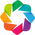

:Overlay
   .Curve.Value :Curve   [timestamp]   (value)
   .Curve.MA48  :Curve   [timestamp]   (MA48)
   .Curve.MA336 :Curve   [timestamp]   (MA336)

In [5]:
# Activate the Bokeh backend
hv.extension('bokeh')

# Convert the DataFrame to a Holoviews Dataset
hv_dataset = hv.Dataset(dataset.reset_index(), ['timestamp'])

# Define the main line plot for the original values
value_curve = hv.Curve(hv_dataset, 'timestamp', 'value', label='Value').opts(color='purple', line_width=2)

# Calculate moving averages
dataset['MA48'] = dataset['value'].rolling(48).mean()
dataset['MA336'] = dataset['value'].rolling(336).mean()

# Convert the DataFrame with moving averages to a Holoviews Dataset
hv_ma_dataset = hv.Dataset(dataset.reset_index(), ['timestamp'])

# Define the line plots for moving averages
ma48_curve = hv.Curve(hv_ma_dataset, 'timestamp', 'MA48', label='MA48').opts(color='orange', line_width=2)
ma336_curve = hv.Curve(hv_ma_dataset, 'timestamp', 'MA336', label='MA336').opts(color='cyan', line_width=2)

# Combine all plots
combined_plot = (value_curve * ma48_curve * ma336_curve)

# Customize plot layout
combined_plot.opts(
    opts.Curve(width=1400, height=600, xlabel='Timestamp', ylabel='Value', title='MACHINE TEMPERATURE FAILURE + MA48 +MA336', bgcolor='#d3d3d3', fontscale=1.2)
)


In [6]:
# drop moving-average columns
dataset.drop(['MA48', 'MA336'], axis=1, inplace=True)
# set timestamp to index
dataset.set_index('timestamp', drop=True, inplace=True)
# resample timeseries to hourly
dataset = dataset.resample('H').sum()
# creature features from date
dataset['day'] = [i.day for i in dataset.index]
dataset['day_name'] = [i.day_name() for i in dataset.index]
dataset['day_of_year'] = [i.dayofyear for i in dataset.index]
dataset['week_of_year'] = [i.weekofyear for i in dataset.index]
dataset['hour'] = [i.hour for i in dataset.index]
dataset['is_weekday'] = [i.isoweekday() for i in dataset.index]
dataset.head()


,value,day,day_name,day_of_year,week_of_year,hour,is_weekday
timestamp,,,,,,,
2013-12-02 21:00:00,702.104364,2,Monday,336,49,21,1
2013-12-02 22:00:00,967.176148,2,Monday,336,49,22,1
2013-12-02 23:00:00,979.500222,2,Monday,336,49,23,1
2013-12-03 00:00:00,995.585452,3,Tuesday,337,49,0,2
2013-12-03 01:00:00,1014.349168,3,Tuesday,337,49,1,2


In [7]:
# Select 90% of the data for modeling
data = dataset.iloc[:int(len(dataset) * 0.80)]

# Create unseen data for predictions
data_unseen = dataset.iloc[int(len(dataset) * 0.80):]

# Print shapes of both datasets
print('Data for Modeling:', data.shape)
print('Unseen Data For Predictions:', data_unseen.shape)


Data for Modeling: (1512, 7)
Unseen Data For Predictions: (379, 7)


## Initialize model and perform anomaly detection

In [8]:
# init setup
s = setup(data, session_id = 123)


,Description,Value
0,Session id,123
1,Original data shape,"(1512, 7)"
2,Transformed data shape,"(1512, 13)"
3,Numeric features,6
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [9]:
# check list of available models
models()


,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [10]:
# train model
iforest = create_model('iforest', fraction = 0.1)
iforest_results = assign_model(iforest)
iforest_results.head()


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,value,day,day_name,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
timestamp,,,,,,,,,
2013-12-02 21:00:00,702.104370,2,Monday,336,49,21,1,1,0.039044
2013-12-02 22:00:00,967.176147,2,Monday,336,49,22,1,1,0.023840
2013-12-02 23:00:00,979.500244,2,Monday,336,49,23,1,1,0.030919
2013-12-03 00:00:00,995.585449,3,Tuesday,337,49,0,2,0,-0.009521
2013-12-03 01:00:00,1014.349182,3,Tuesday,337,49,1,2,0,-0.010118


In [11]:
# check anomalies
iforest_results[iforest_results['Anomaly'] == 1].head()


,value,day,day_name,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
timestamp,,,,,,,,,
2013-12-02 21:00:00,702.104370,2,Monday,336,49,21,1,1,0.039044
2013-12-02 22:00:00,967.176147,2,Monday,336,49,22,1,1,0.023840
2013-12-02 23:00:00,979.500244,2,Monday,336,49,23,1,1,0.030919
2013-12-03 23:00:00,843.760498,3,Tuesday,337,49,23,2,1,0.013497
2013-12-04 00:00:00,776.354492,4,Wednesday,338,49,0,3,1,0.032676


## Predictions on unseen data and plot

In [12]:
unseen_predictions = predict_model(iforest, data=data_unseen)
unseen_predictions.head()


,value,day,day_name_Monday,day_name_Tuesday,day_name_Wednesday,day_name_Thursday,day_name_Friday,day_name_Saturday,day_name_Sunday,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
timestamp,,,,,,,,,,,,,,,
2014-02-03 21:00:00,1177.296831,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,6.0,21.0,1.0,1,0.018119
2014-02-03 22:00:00,1169.459741,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,6.0,22.0,1.0,1,0.018041
2014-02-03 23:00:00,1158.611646,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,6.0,23.0,1.0,1,0.021005
2014-02-04 00:00:00,1160.647994,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,6.0,0.0,2.0,1,0.001892
2014-02-04 01:00:00,1160.449696,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,6.0,1.0,2.0,1,0.001892


In [13]:
# check anomalies
unseen_predictions[unseen_predictions['Anomaly'] == 1].head()


,value,day,day_name_Monday,day_name_Tuesday,day_name_Wednesday,day_name_Thursday,day_name_Friday,day_name_Saturday,day_name_Sunday,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
timestamp,,,,,,,,,,,,,,,
2014-02-03 21:00:00,1177.296831,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,6.0,21.0,1.0,1,0.018119
2014-02-03 22:00:00,1169.459741,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,6.0,22.0,1.0,1,0.018041
2014-02-03 23:00:00,1158.611646,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,6.0,23.0,1.0,1,0.021005
2014-02-04 00:00:00,1160.647994,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,6.0,0.0,2.0,1,0.001892
2014-02-04 01:00:00,1160.449696,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,6.0,1.0,2.0,1,0.001892


In [14]:
# uncomment to plot with PLOTLY

# # Plot training data
# fig = go.Figure()

# # Plot training data
# fig.add_trace(go.Scatter(x=iforest_results.index, y=iforest_results['value'], mode='lines', name='Train Data'))

# # Plot predictions for unseen data
# fig.add_trace(go.Scatter(x=unseen_predictions.index, y=unseen_predictions['value'], mode='lines', name='Unseen Data'))

# # Highlight anomalies in training data
# outlier_dates = iforest_results[iforest_results['Anomaly'] == 1].index
# y_values = [iforest_results.loc[i]['value'] for i in outlier_dates]
# fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode='markers', name='Anomaly (Train)', marker=dict(color='yellow', size=10)))

# # Highlight anomalies in unseen data
# anomalies = unseen_predictions[unseen_predictions['Anomaly'] == 1]
# fig.add_trace(go.Scatter(x=anomalies.index, y=anomalies['value'], mode='markers', name='Anomaly (Unseen)', marker=dict(color='green', size=10)))

# # Set title and layout
# fig.update_layout(title='MACHINE TEMPERATURE FAILURE PREDICTIONS', xaxis_title='Date', yaxis_title='Value', template='plotly_dark')

# # Show the plot
# fig.show()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
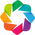

:Overlay
   .Curve.Train_Data                                          :Curve   [x]   (y)
   .Scatter.Anomaly_left_parenthesis_Train_right_parenthesis  :Scatter   [x]   (y)
   .Curve.Unseen_Data                                         :Curve   [x]   (y)
   .Scatter.Anomaly_left_parenthesis_Unseen_right_parenthesis :Scatter   [x]   (y)

In [15]:

# Activate the Bokeh backend
hv.extension('bokeh')

# Define the scatter plots for train data as lines
train_data_plot = hv.Curve((iforest_results.index, iforest_results['value']), label='Train Data').opts(line_width=2, xlabel='Timestamp', ylabel='Value')

# Define the scatter plots for unseen data as lines
unseen_data_plot = hv.Curve((unseen_predictions.index, unseen_predictions['value']), label='Unseen Data').opts(line_width=2, xlabel='Timestamp', ylabel='Value')

# Highlight anomalies in training data
train_anomalies = iforest_results[iforest_results['Anomaly'] == 1]
train_anomalies_plot = hv.Scatter((train_anomalies.index, train_anomalies['value']), label='Anomaly (Train)').opts(color='yellow', size=8)

# Highlight anomalies in unseen data
unseen_anomalies = unseen_predictions[unseen_predictions['Anomaly'] == 1]
unseen_anomalies_plot = hv.Scatter((unseen_anomalies.index, unseen_anomalies['value']), label='Anomaly (Unseen)').opts(color='green', size=8)

# Combine all plots
combined_plot = (train_data_plot * train_anomalies_plot * unseen_data_plot * unseen_anomalies_plot)

# Customize plot layout
combined_plot.opts(
    opts.Curve(width=1400, height=600, xlabel='Timestamp', ylabel='Value', title='MACHINE TEMPERATURE FAILURE PREDICTIONS', bgcolor='#d3d3d3', fontscale=1.2)
)


## Evaluation

In [16]:
# NOTE: anomaly points can be found here : https://github.com/numenta/NAB/blob/master/labels/combined_windows.json

anomaly_points = [
        ["2013-12-10 06:25:00.000000","2013-12-12 05:35:00.000000"],
        ["2013-12-15 17:50:00.000000","2013-12-17 17:00:00.000000"],
        ["2014-01-27 14:20:00.000000","2014-01-29 13:30:00.000000"],
        ["2014-02-07 14:55:00.000000","2014-02-09 14:05:00.000000"]
]


In [17]:
iforest_results['anomaly_true'] = 0
for start, end in anomaly_points:
    iforest_results.loc[((iforest_results.index >= start) & (iforest_results.index <= end)), 'anomaly_true'] = 1

iforest_results.head()


,value,day,day_name,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score,anomaly_true
timestamp,,,,,,,,,,
2013-12-02 21:00:00,702.104370,2,Monday,336,49,21,1,1,0.039044,0
2013-12-02 22:00:00,967.176147,2,Monday,336,49,22,1,1,0.023840,0
2013-12-02 23:00:00,979.500244,2,Monday,336,49,23,1,1,0.030919,0
2013-12-03 00:00:00,995.585449,3,Tuesday,337,49,0,2,0,-0.009521,0
2013-12-03 01:00:00,1014.349182,3,Tuesday,337,49,1,2,0,-0.010118,0


In [18]:
unseen_predictions['anomaly_true'] = 0
for start, end in anomaly_points:
    unseen_predictions.loc[((unseen_predictions.index >= start) & (unseen_predictions.index <= end)), 'anomaly_true'] = 1

unseen_predictions.head()


,value,day,day_name_Monday,day_name_Tuesday,day_name_Wednesday,day_name_Thursday,day_name_Friday,day_name_Saturday,day_name_Sunday,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score,anomaly_true
timestamp,,,,,,,,,,,,,,,,
2014-02-03 21:00:00,1177.296831,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,6.0,21.0,1.0,1,0.018119,0
2014-02-03 22:00:00,1169.459741,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,6.0,22.0,1.0,1,0.018041,0
2014-02-03 23:00:00,1158.611646,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,6.0,23.0,1.0,1,0.021005,0
2014-02-04 00:00:00,1160.647994,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,6.0,0.0,2.0,1,0.001892,0
2014-02-04 01:00:00,1160.449696,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,6.0,1.0,2.0,1,0.001892,0


In [19]:
accuracy_train = accuracy_score(iforest_results['anomaly_true'], iforest_results['Anomaly'])
accuracy_unseen = accuracy_score(unseen_predictions['anomaly_true'], unseen_predictions['Anomaly'])
print(f'Accuracy on train data: {accuracy_train} | Accuracy on unseen data: {accuracy_unseen}')


Accuracy on train data: 0.832010582010582 | Accuracy on unseen data: 0.8891820580474934


In [20]:
f1_train = f1_score(iforest_results['anomaly_true'],
                    iforest_results['Anomaly'],
                    average='macro'
                    )
f1_unseen = f1_score(unseen_predictions['anomaly_true'],
                     unseen_predictions['Anomaly'],
                     average='macro')

print(f'F1 score on train data: {f1_train} | F1 score on unseen data: {f1_unseen}')


F1 score on train data: 0.5215070643642072 | F1 score on unseen data: 0.8073627650304966


In [21]:
# uncomment to plot with PLOTLY

# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Create subplots with two side-by-side plots
# fig = make_subplots(rows=1, cols=2, subplot_titles=('Train Data', 'Unseen Data'))

# # Plot training data
# fig.add_trace(go.Scatter(x=iforest_results.index, y=iforest_results['value'], mode='lines', name='Train Data'), row=1, col=1)

# # Highlight actual anomalies in training data
# train_actual_anomalies = iforest_results[iforest_results['anomaly_true'] == 1]
# fig.add_trace(go.Scatter(x=train_actual_anomalies.index, y=train_actual_anomalies['value'], mode='markers', name='Actual Anomaly (Train)', marker=dict(color='yellow', size=10)), row=1, col=1)

# # Plot predicted anomalies in training data
# train_predicted_anomalies = iforest_results[iforest_results['Anomaly'] == 1]
# fig.add_trace(go.Scatter(x=train_predicted_anomalies.index, y=train_predicted_anomalies['value'], mode='markers', name='Predicted Anomaly (Train)', marker=dict(color='red', size=6)), row=1, col=1)

# # Plot unseen data
# fig.add_trace(go.Scatter(x=unseen_predictions.index, y=unseen_predictions['value'], mode='lines', name='Unseen Data'), row=1, col=2)

# # Highlight actual anomalies in unseen data
# unseen_actual_anomalies = unseen_predictions[unseen_predictions['anomaly_true'] == 1]
# fig.add_trace(go.Scatter(x=unseen_actual_anomalies.index, y=unseen_actual_anomalies['value'], mode='markers', name='Actual Anomaly (Unseen)', marker=dict(color='green', size=10)), row=1, col=2)

# # Plot predicted anomalies in unseen data
# unseen_predicted_anomalies = unseen_predictions[unseen_predictions['Anomaly'] == 1]
# fig.add_trace(go.Scatter(x=unseen_predicted_anomalies.index, y=unseen_predicted_anomalies['value'], mode='markers', name='Predicted Anomaly (Unseen)', marker=dict(color='blue', size=6)), row=1, col=2)

# # Update layout
# fig.update_layout(title='MACHINE TEMPERATURE FAILURE TRUE & PREDICTIONS', template='plotly_dark')

# # Show the plot
# fig.show()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
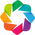

:Layout
   .Overlay.I  :Overlay
      .Curve.Train_Data                                                   :Curve   [timestamp]   (value)
      .Scatter.Actual_Anomaly_left_parenthesis_Train_right_parenthesis    :Scatter   [timestamp]   (value)
      .Scatter.Predicted_Anomaly_left_parenthesis_Train_right_parenthesis :Scatter   [timestamp]   (value)
   .Overlay.II :Overlay
      .Curve.Unseen_Data                                                   :Curve   [timestamp]   (value)
      .Scatter.Actual_Anomaly_left_parenthesis_Unseen_right_parenthesis    :Scatter   [timestamp]   (value)
      .Scatter.Predicted_Anomaly_left_parenthesis_Unseen_right_parenthesis :Scatter   [timestamp]   (value)

In [22]:
hv.extension('bokeh')

# Define the curve plots for train data
train_data_plot = hv.Curve(iforest_results, 'timestamp', 'value', label='Train Data')

# Highlight actual anomalies in training data
train_actual_anomalies = iforest_results[iforest_results['anomaly_true'] == 1]
train_actual_anomalies_plot = hv.Scatter(train_actual_anomalies, 'timestamp', 'value', label='Actual Anomaly (Train)').opts(color='yellow', size=10)

# Plot predicted anomalies in training data
train_predicted_anomalies = iforest_results[iforest_results['Anomaly'] == 1]
train_predicted_anomalies_plot = hv.Scatter(train_predicted_anomalies, 'timestamp', 'value', label='Predicted Anomaly (Train)').opts(color='red', size=6)

# Define the curve plots for unseen data
unseen_data_plot = hv.Curve(unseen_predictions, 'timestamp', 'value', label='Unseen Data')

# Highlight actual anomalies in unseen data
unseen_actual_anomalies = unseen_predictions[unseen_predictions['anomaly_true'] == 1]
unseen_actual_anomalies_plot = hv.Scatter(unseen_actual_anomalies, 'timestamp', 'value', label='Actual Anomaly (Unseen)').opts(color='green', size=10)

# Plot predicted anomalies in unseen data
unseen_predicted_anomalies = unseen_predictions[unseen_predictions['Anomaly'] == 1]
unseen_predicted_anomalies_plot = hv.Scatter(unseen_predicted_anomalies, 'timestamp', 'value', label='Predicted Anomaly (Unseen)').opts(color='blue', size=6)

# Combine all plots
combined_plot = (train_data_plot * train_actual_anomalies_plot * train_predicted_anomalies_plot +
                 unseen_data_plot * unseen_actual_anomalies_plot * unseen_predicted_anomalies_plot)

# Customize plot layout
combined_plot.opts(
    opts.Curve(width=750, height=600, xlabel='Timestamp', ylabel='Value', title='MACHINE TEMPERATURE FAILURE TRUE & PREDICTIONS', bgcolor='#d3d3d3', fontscale=1.2)
)


# END NOTEBOOK